In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Các model scikit learn cho bài toán phân loại
from sklearn.svm import SVC # Support vector machine
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import json
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path
import os, sys

# Đường dẫn gốc của dự án
ROOT_PATH = Path('d:/GiaoPhan_Workspace/sem_6/pbl5/baby_posture_analysis')
# Thêm đường dẫn vào sys.path để import các module tự định nghĩa
sys.path.append(str(ROOT_PATH))

# from app.utils.training_storage_helper import save_params, save_model
# from app.utils.progress_wrapper import ProgressWrapper

seed = 42
np.random.seed(seed)

In [2]:
train_df = pd.read_csv("../data_cleaned/keypoints_extract.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 100 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nose_x              338 non-null    float64
 1   nose_y              338 non-null    float64
 2   nose_z              338 non-null    float64
 3   left_eye_inner_x    338 non-null    float64
 4   left_eye_inner_y    338 non-null    float64
 5   left_eye_inner_z    338 non-null    float64
 6   left_eye_x          338 non-null    float64
 7   left_eye_y          338 non-null    float64
 8   left_eye_z          338 non-null    float64
 9   left_eye_outer_x    338 non-null    float64
 10  left_eye_outer_y    338 non-null    float64
 11  left_eye_outer_z    338 non-null    float64
 12  right_eye_inner_x   338 non-null    float64
 13  right_eye_inner_y   338 non-null    float64
 14  right_eye_inner_z   338 non-null    float64
 15  right_eye_x         338 non-null    float64
 16  right_e

In [3]:
train_df.columns

Index(['nose_x', 'nose_y', 'nose_z', 'left_eye_inner_x', 'left_eye_inner_y',
       'left_eye_inner_z', 'left_eye_x', 'left_eye_y', 'left_eye_z',
       'left_eye_outer_x', 'left_eye_outer_y', 'left_eye_outer_z',
       'right_eye_inner_x', 'right_eye_inner_y', 'right_eye_inner_z',
       'right_eye_x', 'right_eye_y', 'right_eye_z', 'right_eye_outer_x',
       'right_eye_outer_y', 'right_eye_outer_z', 'left_ear_x', 'left_ear_y',
       'left_ear_z', 'right_ear_x', 'right_ear_y', 'right_ear_z',
       'mouth_left_x', 'mouth_left_y', 'mouth_left_z', 'mouth_right_x',
       'mouth_right_y', 'mouth_right_z', 'left_shoulder_x', 'left_shoulder_y',
       'left_shoulder_z', 'right_shoulder_x', 'right_shoulder_y',
       'right_shoulder_z', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z',
       'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'left_wrist_x',
       'left_wrist_y', 'left_wrist_z', 'right_wrist_x', 'right_wrist_y',
       'right_wrist_z', 'left_pinky_x', 'left_pinky_y', 'left_

In [4]:
train_df.head(5)

,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,left_eye_outer_x,...,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z,label
0,-0.032375,-0.443125,-0.128192,-0.013339,-0.473960,-0.159927,-0.009985,-0.472266,-0.160281,-0.006803,...,-0.057832,0.703865,0.303709,-0.211990,0.652212,0.211996,-0.120779,0.827830,0.334756,nam_nghieng
1,0.086624,-0.484814,-0.119727,0.049050,-0.508999,-0.101510,0.043915,-0.507234,-0.101985,0.038644,...,0.340321,0.419327,-0.293603,0.435128,0.586154,0.190997,0.483980,0.323302,-0.348363,nam_nghieng
2,0.039504,-0.391531,-0.277027,0.034164,-0.429585,-0.238979,0.035597,-0.432467,-0.239557,0.037350,...,0.143415,0.648804,0.085500,0.153767,0.830740,0.607296,0.216028,0.732659,0.139018,nam_nghieng
3,-0.021387,-0.424396,-0.398574,0.000573,-0.468604,-0.376664,0.010666,-0.464507,-0.377072,0.021906,...,-0.117428,0.810201,-0.054123,-0.132729,0.956947,-0.155732,-0.144058,0.955609,-0.163413,nam_nghieng
4,0.011442,-0.454324,-0.201684,0.032945,-0.436385,-0.208714,0.035106,-0.428058,-0.209211,0.037092,...,-0.104175,0.700091,-0.075656,-0.118948,0.738366,-0.263685,-0.170853,0.700027,-0.193758,nam_nghieng


<Axes: xlabel='label', ylabel='count'>

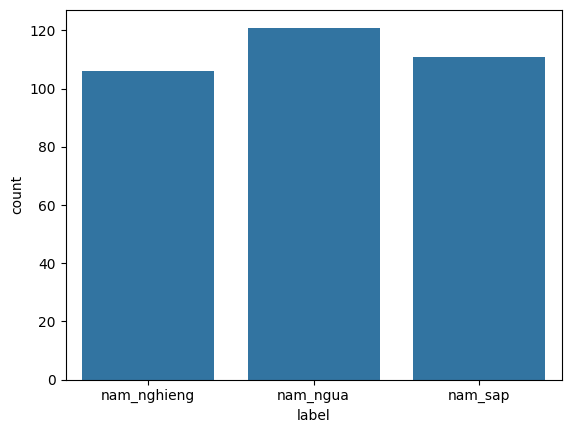

In [5]:
sns.countplot(x="label", data=train_df)

In [7]:
label_encode = {
    'nam_ngua': 0,
    'nam_nghieng': 1,
    'nam_sap': 2,
}

train_df['label'] = train_df['label'].map(label_encode)
train_df.head(5)
# from sklearn.preprocessing import LabelEncoder

# # Khởi tạo LabelEncoder
# label_encoder = LabelEncoder()
# train_df["label"] = label_encoder.fit_transform(train_df["label"])

,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,left_eye_outer_x,...,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z,label
0,-0.032375,-0.443125,-0.128192,-0.013339,-0.473960,-0.159927,-0.009985,-0.472266,-0.160281,-0.006803,...,-0.057832,0.703865,0.303709,-0.211990,0.652212,0.211996,-0.120779,0.827830,0.334756,1
1,0.086624,-0.484814,-0.119727,0.049050,-0.508999,-0.101510,0.043915,-0.507234,-0.101985,0.038644,...,0.340321,0.419327,-0.293603,0.435128,0.586154,0.190997,0.483980,0.323302,-0.348363,1
2,0.039504,-0.391531,-0.277027,0.034164,-0.429585,-0.238979,0.035597,-0.432467,-0.239557,0.037350,...,0.143415,0.648804,0.085500,0.153767,0.830740,0.607296,0.216028,0.732659,0.139018,1
3,-0.021387,-0.424396,-0.398574,0.000573,-0.468604,-0.376664,0.010666,-0.464507,-0.377072,0.021906,...,-0.117428,0.810201,-0.054123,-0.132729,0.956947,-0.155732,-0.144058,0.955609,-0.163413,1
4,0.011442,-0.454324,-0.201684,0.032945,-0.436385,-0.208714,0.035106,-0.428058,-0.209211,0.037092,...,-0.104175,0.700091,-0.075656,-0.118948,0.738366,-0.263685,-0.170853,0.700027,-0.193758,1


In [8]:
# Extract features
X_train = train_df.drop(columns="label")
y_train = train_df["label"]

In [9]:
X_train.head(5)

,nose_x,nose_y,nose_z,left_eye_inner_x,left_eye_inner_y,left_eye_inner_z,left_eye_x,left_eye_y,left_eye_z,left_eye_outer_x,...,left_heel_z,right_heel_x,right_heel_y,right_heel_z,left_foot_index_x,left_foot_index_y,left_foot_index_z,right_foot_index_x,right_foot_index_y,right_foot_index_z
0,-0.032375,-0.443125,-0.128192,-0.013339,-0.473960,-0.159927,-0.009985,-0.472266,-0.160281,-0.006803,...,0.185923,-0.057832,0.703865,0.303709,-0.211990,0.652212,0.211996,-0.120779,0.827830,0.334756
1,0.086624,-0.484814,-0.119727,0.049050,-0.508999,-0.101510,0.043915,-0.507234,-0.101985,0.038644,...,0.249638,0.340321,0.419327,-0.293603,0.435128,0.586154,0.190997,0.483980,0.323302,-0.348363
2,0.039504,-0.391531,-0.277027,0.034164,-0.429585,-0.238979,0.035597,-0.432467,-0.239557,0.037350,...,0.568429,0.143415,0.648804,0.085500,0.153767,0.830740,0.607296,0.216028,0.732659,0.139018
3,-0.021387,-0.424396,-0.398574,0.000573,-0.468604,-0.376664,0.010666,-0.464507,-0.377072,0.021906,...,-0.027458,-0.117428,0.810201,-0.054123,-0.132729,0.956947,-0.155732,-0.144058,0.955609,-0.163413
4,0.011442,-0.454324,-0.201684,0.032945,-0.436385,-0.208714,0.035106,-0.428058,-0.209211,0.037092,...,-0.128815,-0.104175,0.700091,-0.075656,-0.118948,0.738366,-0.263685,-0.170853,0.700027,-0.193758


In [10]:
y_train.unique()

array([1, 0, 2], dtype=int64)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.26654924, -0.42278646,  0.18988859, ..., -0.52433984,
         0.84524843,  0.98596187],
       [ 0.84322697, -1.44593064,  0.23605976, ...,  2.20603207,
        -1.66291953, -1.07126623],
       [ 0.40378581,  0.8434306 , -0.62191616, ...,  0.99627925,
         0.37212574,  0.39649169],
       ...,
       [-1.22569016, -0.89405023,  0.32955834, ...,  0.15358518,
        -0.97398116,  1.96052523],
       [ 1.85594771,  0.83760794,  0.63766123, ...,  0.82131027,
        -1.39398221,  2.15524985],
       [ 0.42426956, -0.97736976,  1.4823183 , ..., -0.02776408,
         0.04746122, -0.33248531]])

In [12]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=seed)

In [13]:
def evaluate_model(name, model, results):
    # Đánh giá Model
    accuracy = cross_val_score(
        model, X_train, y_train, cv=k_fold, scoring="accuracy", n_jobs=4, verbose=1
    ).mean()

    f1_score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring="f1_macro", n_jobs=4).mean()
    results.append((name, accuracy, f1_score))

In [14]:
algorithms = [
    ("LR", LogisticRegression(random_state=seed)),
    ("SVC", SVC(probability=True, random_state=seed)),
    ("KNN", KNeighborsClassifier()),
    ("DTC", DecisionTreeClassifier(random_state=seed)),
    ("RF", RandomForestClassifier(random_state=seed)),
    ("XGB", XGBClassifier(random_state=seed)),
]

models = {}
results_before_tunning = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model
    evaluate_model(name, model, results_before_tunning)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.3s finished


In [15]:
def print_results(results):
    results.sort(key=lambda el: el[2], reverse=True)

    return pd.DataFrame(
        results,
        columns=[
            "Model",
            "Accuracy score",
            "F1 score",
        ],
    )

print_results(results_before_tunning)

,Model,Accuracy score,F1 score
0,RF,0.949737,0.949164
1,SVC,0.943898,0.943355
2,XGB,0.937928,0.935998
3,LR,0.911150,0.909585
4,KNN,0.905575,0.902937
5,DTC,0.872827,0.870827


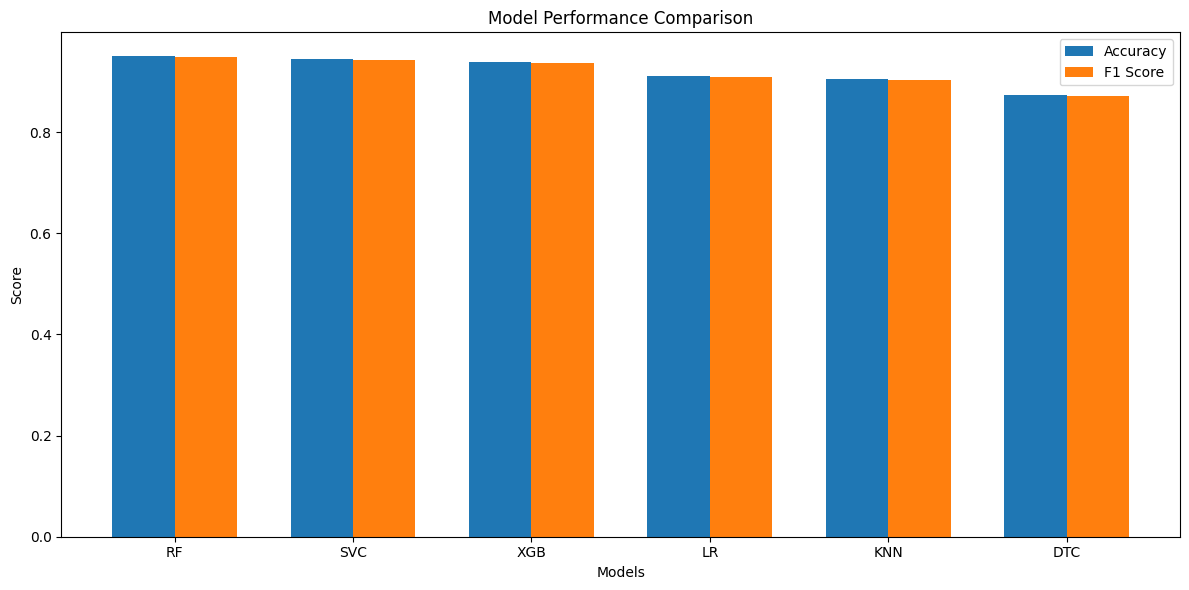

In [16]:
# Display the results in a DataFrame for better readability
results_df = pd.DataFrame(results_before_tunning, columns=['Model', 'Accuracy', 'F1 Score'])
# Visualize the results
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(results_df))

plt.bar(index, results_df['Accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, results_df['F1 Score'], bar_width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(index + bar_width/2, results_df['Model'])
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
y_pred = models['RF'].predict(X_train)
cm_full_train = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_train, y_pred)
cm_full_train, accuracy

(array([[120,   1,   0],
        [  0, 106,   0],
        [  0,   0, 111]], dtype=int64),
 0.9970414201183432)

In [18]:
svc_best_model = RandomForestClassifier(random_state=seed)

svc_best_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
accuracy = cross_val_score(svc_best_model, X_train, y_train, cv=k_fold, scoring="accuracy").mean()
y_pred = cross_val_predict(svc_best_model, X_train, y_train, cv=k_fold)
cm_cross_val = confusion_matrix(y_train, y_pred)
accuracy, cm_cross_val

(0.9497366110623353,
 array([[117,   4,   0],
        [  4, 100,   2],
        [  3,   4, 104]], dtype=int64))

<Axes: >

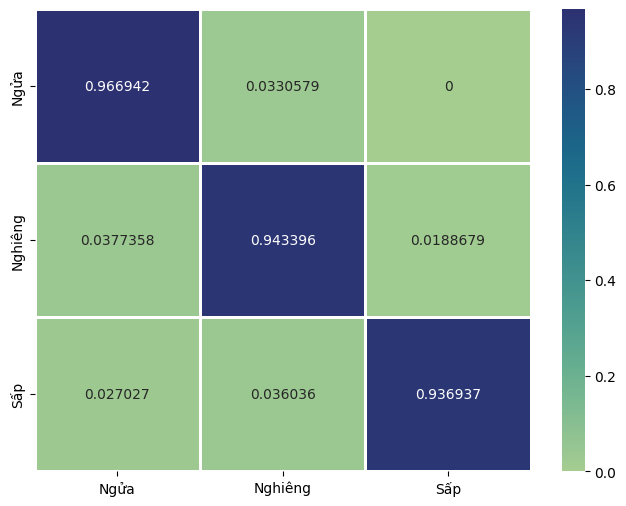

In [20]:
label_counts = np.sum(cm_cross_val, axis=1)
cm_cross_val = cm_cross_val / label_counts[:, None]
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["Ngửa", "Nghiêng", "Sấp"], columns=["Ngửa", "Nghiêng", "Sấp"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest")

In [21]:
random_forest = models["RF"]

# Định nghĩa phạm vi của các siêu tham số cần tối ưu
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_features': ['log2', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Tạo RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid,
                                n_iter = 100, cv = k_fold, verbose=3, random_state=seed, n_jobs = -1)

# Tiến hành tìm kiếm siêu tham số
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=3)

In [22]:
random_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10,
 'bootstrap': True}

In [23]:
def save_params(params: dict, file_path: str):
    if not os.path.exists(file_path):
        os.makedirs(os.path.dirname(file_path), exist_ok=True)

    with open(file_path, 'w') as f:
        json.dump(params, f)

hyper_parameters_path = "../app/hyper_parameters/"
        
save_params(random_search.best_params_, f"./{hyper_parameters_path}/random_forest.json")

In [24]:
with open(f'./{hyper_parameters_path}/random_forest.json', 'r') as f:
    best_params = json.load(f)
    best_params["bootstrap"] = bool(best_params["bootstrap"])
    
results_after_tuning = []

# Khởi tạo một mô hình Random Forest mới với các tham số tối ưu
best_random_forest_model = RandomForestClassifier(**best_params, random_state=seed, verbose=1)
best_random_forest_model.fit(X_train, y_train)

# Huấn luyện mô hình mới với dữ liệu huấn luyện của bạn
result = []
evaluate_model("RF", best_random_forest_model, result)
results_after_tuning.append(result[0])
print_results(result)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.8s finished


,Model,Accuracy score,F1 score
0,RF,0.952722,0.951372


In [25]:
accuracy_rf_best = cross_val_score(best_random_forest_model, X_train, y_train, cv=k_fold, scoring="accuracy").mean()
y_pred_rf_best = cross_val_predict(best_random_forest_model, X_train, y_train, cv=k_fold)
cm_cross_val_rf_best = confusion_matrix(y_train, y_pred_rf_best)
accuracy_rf_best, cm_cross_val_rf_best

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Do

(0.9527216856892011,
 array([[116,   5,   0],
        [  2, 101,   3],
        [  3,   3, 105]], dtype=int64))

<Axes: >

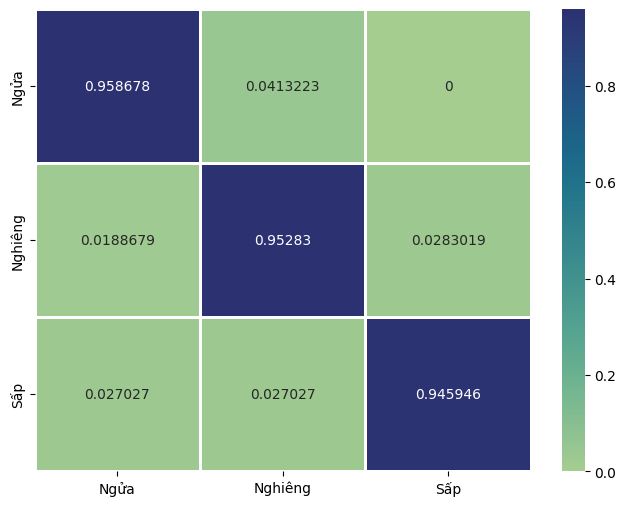

In [26]:
label_counts = np.sum(cm_cross_val_rf_best, axis=1)
cm_cross_val = cm_cross_val_rf_best / label_counts[:, None]
confusion_matrix_df = pd.DataFrame(cm_cross_val, index=["Ngửa", "Nghiêng", "Sấp"], columns=["Ngửa", "Nghiêng", "Sấp"])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, linewidths=1, annot=True, ax=ax, fmt="g", cmap="crest")

In [27]:
import pickle 

model_path = "../app/models"

def save_model(model, file_name: str):
    if not os.path.exists(os.path.dirname(file_name)):
        os.makedirs(os.path.dirname(file_name), exist_ok=True)

    with open(file_name, "wb") as file:
        pickle.dump(model, file)

def load_model(file_name: str):
    with open(file_name, "rb") as file:
        model = pickle.load(file)
        return model
    
save_model(scaler, f"{model_path}/input_scaler.pkl")
save_model(best_random_forest_model, f"{model_path}/random_forest.pkl")